In [9]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Define Paths
PROJECT_ROOT = os.path.join("/home/ar-in-u-301/Documents/codes", "review-recommendations")
DATA_PATH = os.path.join(PROJECT_ROOT, "data")

In [3]:
sys.path.append(PROJECT_ROOT)

In [4]:
train = pd.read_feather(os.path.join(DATA_PATH, "train_review.feather"))

In [5]:
train.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
1094389,rJ3CASyRfG-7ZviCBFCJQg,---1lKK3aKOuomHnwAkAow,f19eLfhXqR47Ct8Hz2y_pA,5.0,0,0,0,I hard think luxurious experience begins to de...,2018-12-19 22:26:22
2692140,S6qcxvgYMymqVlWcaNDm2Q,---2PmXbF47D870stH1jqA,0ZsqqzHu1HHkDdIKoivi5g,5.0,2,0,2,The TAMPA TREASURE and his TEAM have hit anoth...,2016-08-23 21:25:13
5792002,c4epF4UIlXj1gvDsBa6cIA,---2PmXbF47D870stH1jqA,1An4DxtMmvvSe0HX4viRCA,5.0,0,0,0,This is our go to restaurant for Italian Food....,2014-11-02 13:47:48
4552277,NodVS_DFat6-vXLioCGGhg,---2PmXbF47D870stH1jqA,3YqUe2FTCQr0pPVK8oCv6Q,5.0,1,0,1,Girls night out.... Eric T was our waiter.... ...,2015-09-30 12:42:34
2617903,keNOvKVgHOyIGmZNnMXJHw,---2PmXbF47D870stH1jqA,3gXgILE2YWVidJDvVWBT6Q,5.0,2,0,1,Shame on me for nor writing a review sooner......,2016-05-21 01:10:35


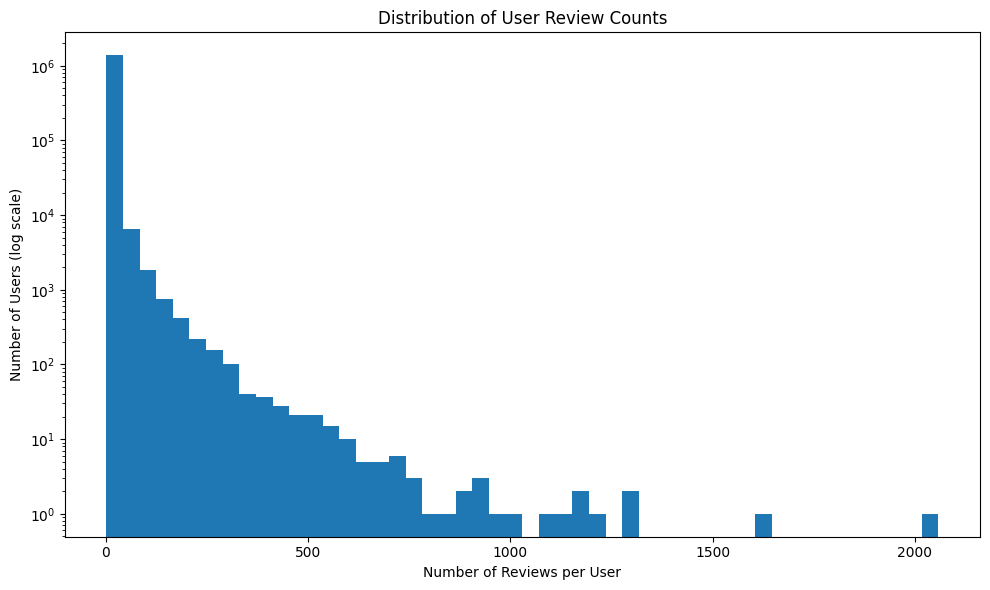

In [7]:
# Count number of reviews per user
user_review_counts = train['user_id'].value_counts()

# Plot the distribution (histogram)
plt.figure(figsize=(10,6))
plt.hist(user_review_counts, bins=50, log=True)
plt.xlabel('Number of Reviews per User')
plt.ylabel('Number of Users (log scale)')
plt.title('Distribution of User Review Counts')
plt.tight_layout()
plt.show()

In [8]:
user_review_counts

user_id
_BcWyKQL16ndpBdggh2kNA    2058
Xw7ZjaGfr0WNVt6s_5KZfA    1616
0Igx-a1wAstiBDerGxXk2A    1313
1HM81n6n4iPIFU5d2Lokhw    1284
VL12EhEdT4OWqGq0nIqkzw    1216
                          ... 
zzsYzTqZJTSTinEEPRD2Gw       1
zzsUIpBjii2kUXmc5wasPQ       1
zzsHsc0Nf_jHWrfC555Xdg       1
zzsFjUQrOLov5lM2o07yjQ       1
zzrYdQzdvy_fNqkCrydadA       1
Name: count, Length: 1392850, dtype: int64

In [16]:
percentiles = np.arange(0, 101, 5)
percentile_values = np.percentile(user_review_counts, percentiles)

In [17]:
for p, v in zip(percentiles, percentile_values):
    print(f"Percentile {p} Value: {v}")

Percentile 0 Value: 1.0
Percentile 5 Value: 1.0
Percentile 10 Value: 1.0
Percentile 15 Value: 1.0
Percentile 20 Value: 1.0
Percentile 25 Value: 1.0
Percentile 30 Value: 1.0
Percentile 35 Value: 1.0
Percentile 40 Value: 1.0
Percentile 45 Value: 1.0
Percentile 50 Value: 1.0
Percentile 55 Value: 1.0
Percentile 60 Value: 2.0
Percentile 65 Value: 2.0
Percentile 70 Value: 2.0
Percentile 75 Value: 3.0
Percentile 80 Value: 3.0
Percentile 85 Value: 4.0
Percentile 90 Value: 6.0
Percentile 95 Value: 10.0
Percentile 100 Value: 2058.0


In [18]:
sum(user_review_counts > 20)

27483

In [19]:
train['user_id'].nunique()

1392850

In [20]:
27483 / 1392850

0.019731485802491296

# Less than 2% of the users have given more than 20 reviews over time period between 2005-2018

## Let's use latest 10 tweets for every user to create an user embedding

In [21]:
train['business_id'].nunique()

138212

In [23]:
business_review_counts = train['business_id'].value_counts()

In [24]:
percentile_values = np.percentile(user_review_counts, percentiles)
for p,v in zip(percentiles, percentile_values):
    print(f"Percentile: {p}, Value: {v}")

Percentile: 0, Value: 1.0
Percentile: 5, Value: 1.0
Percentile: 10, Value: 1.0
Percentile: 15, Value: 1.0
Percentile: 20, Value: 1.0
Percentile: 25, Value: 1.0
Percentile: 30, Value: 1.0
Percentile: 35, Value: 1.0
Percentile: 40, Value: 1.0
Percentile: 45, Value: 1.0
Percentile: 50, Value: 1.0
Percentile: 55, Value: 1.0
Percentile: 60, Value: 2.0
Percentile: 65, Value: 2.0
Percentile: 70, Value: 2.0
Percentile: 75, Value: 3.0
Percentile: 80, Value: 3.0
Percentile: 85, Value: 4.0
Percentile: 90, Value: 6.0
Percentile: 95, Value: 10.0
Percentile: 100, Value: 2058.0


# Let's use last 10 reviews for business to conduct embeddings